In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2021-07-18 22:03:57--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.1s    

2021-07-18 22:03:57 (2.11 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [ ]:
!pip install -U arch statsmodels

     |████████████████████████████████| 808kB 5.3MB/s 
     |████████████████████████████████| 9.5MB 11.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('SPY.csv', parse_dates=True, index_col='Date')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df['LogRet'] = np.log(df['Close']).diff()

In [ ]:
# df2 = df.loc['2010-01-05':'2015-01-01'].copy()
df2 = df.iloc[1:].copy()

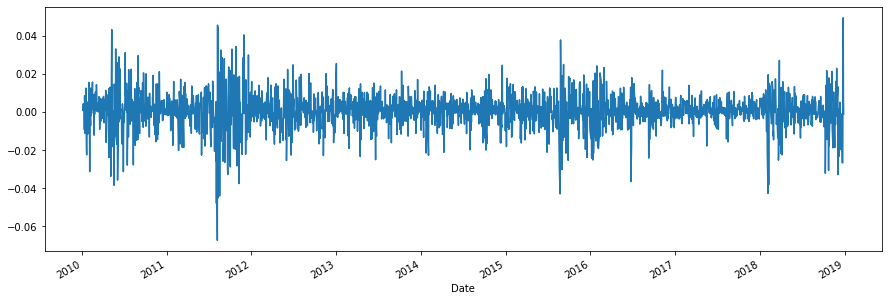

In [ ]:
df2['LogRet'].plot(figsize=(15, 5));

In [ ]:
df2['Ysq'] = df['LogRet'] ** 2

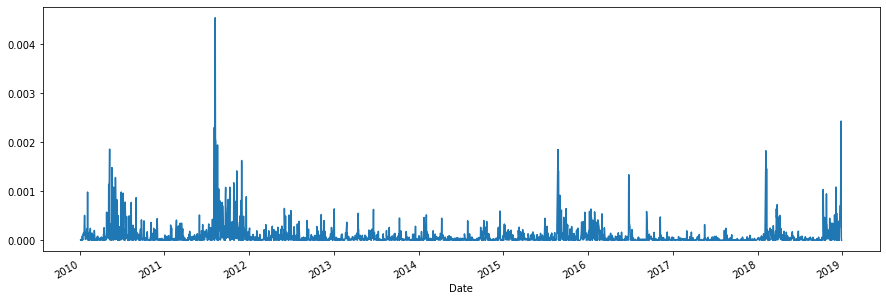

In [ ]:
df2['Ysq'].plot(figsize=(15, 5));

## ACF and PACF

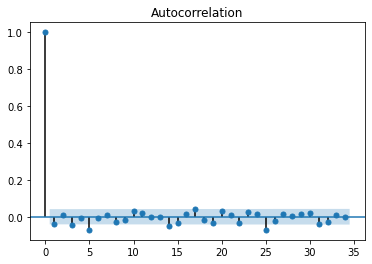

In [ ]:
plot_acf(df2['LogRet']);

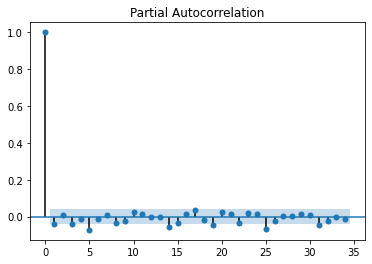

In [ ]:
plot_pacf(df2['LogRet']);

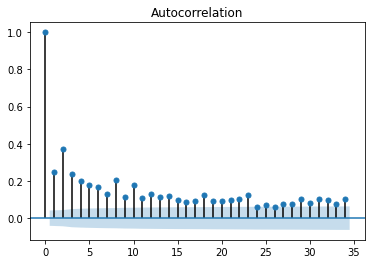

In [ ]:
plot_acf(df2['Ysq']);

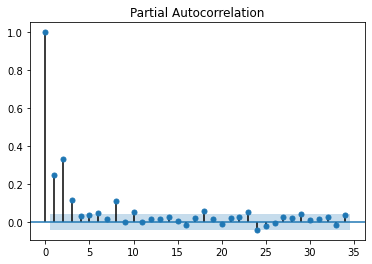

In [ ]:
plot_pacf(df2['Ysq']);

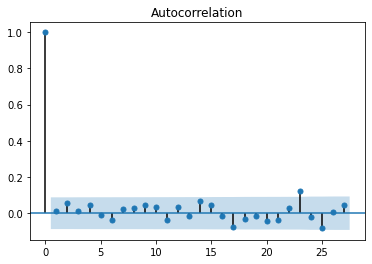

In [ ]:
noise_sq = np.random.randn(500)**2
plot_acf(noise_sq);

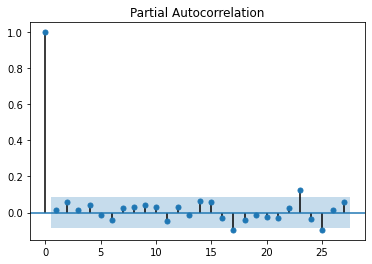

In [ ]:
plot_pacf(noise_sq);

## Train-Test Split

In [ ]:
Ntest = 500
train = df2.iloc[:-Ntest][['LogRet']].copy()
test = df2.iloc[-Ntest:][['LogRet']].copy()

## Why do we need scaling?

In [ ]:
model = arch_model(train['LogRet'], vol='GARCH', p=1, q=1)

In [ ]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -5875.961123510235
Iteration:      2,   Func. Count:     20,   Neg. LLF: -5876.700886523153
Iteration:      3,   Func. Count:     36,   Neg. LLF: -5876.660726099473
Iteration:      4,   Func. Count:     50,   Neg. LLF: -5876.701079511183
Iteration:      5,   Func. Count:     66,   Neg. LLF: -5876.68460929171
Iteration:      6,   Func. Count:     80,   Neg. LLF: -5876.701264978783
Iteration:      7,   Func. Count:     96,   Neg. LLF: -5876.62440572386
Iteration:      8,   Func. Count:    112,   Neg. LLF: -5876.701266640755
Iteration:      9,   Func. Count:    128,   Neg. LLF: -5876.625371249061
Iteration:     10,   Func. Count:    142,   Neg. LLF: -5876.701265719171
Iteration:     11,   Func. Count:    158,   Neg. LLF: -5876.529143831156
Iteration:     12,   Func. Count:    172,   Neg. LLF: -5876.701450533785
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5876.701452657021
            Iter

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.532e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


## ARCH(1)

In [ ]:
m = train['LogRet'].mean()
s = test['LogRet'].std()
train['Scaled'] = (train['LogRet'] - m) / s
test['Scaled'] = (test['LogRet'] - m) / s
df2['Scaled'] = (df2['LogRet'] - m) / s

In [ ]:
arch1 = arch_model(train['Scaled'], vol='ARCH', p=1)

In [ ]:
res_arch1 = arch1.fit(update_freq=10)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2758.9937048801476
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7


In [ ]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2758.99
Distribution:                  Normal   AIC:                           5523.99
Method:            Maximum Likelihood   BIC:                           5540.41
                                        No. Observations:                 1762
Date:                Sun, Jul 18 2021   Df Residuals:                     1761
Time:                        22:07:07   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0150  2.759e-02      0.545      0.586 [-3.904e-02,6.910e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.1523  9.460e-02     12.181  3.936e-34   [  0.967,  1.338]
alpha[1]       0.1771  4.774e-02      3.709  2.079e-04 [8.350e-02,  0.271]
==========================================================================

Covariance estimator: robust
"""

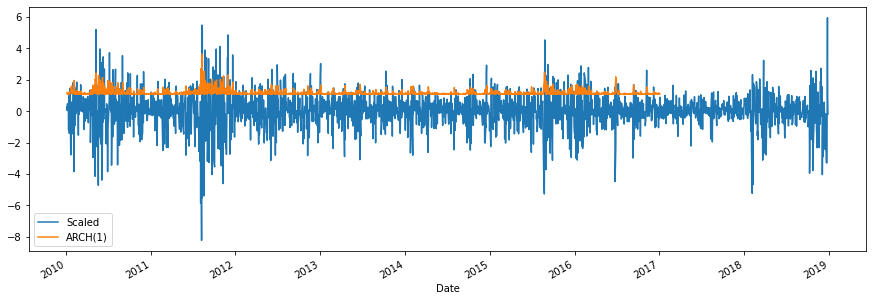

In [ ]:
df2['ARCH(1)'] = res_arch1.conditional_volatility
df2[['Scaled', 'ARCH(1)']].plot(figsize=(15, 5));

In [ ]:
res_arch1.forecast(horizon=Ntest)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [ ]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=True)

In [ ]:
fcast_arch1

In [ ]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,h.011,h.012,h.013,h.014,h.015,h.016,h.017,h.018,h.019,h.020,h.021,h.022,h.023,h.024,h.025,h.026,h.027,h.028,h.029,h.030,h.031,h.032,h.033,h.034,h.035,h.036,h.037,h.038,h.039,h.040,...,h.461,h.462,h.463,h.464,h.465,h.466,h.467,h.468,h.469,h.470,h.471,h.472,h.473,h.474,h.475,h.476,h.477,h.478,h.479,h.480,h.481,h.482,h.483,h.484,h.485,h.486,h.487,h.488,h.489,h.490,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,h.011,h.012,h.013,h.014,h.015,h.016,h.017,h.018,h.019,h.020,h.021,h.022,h.023,h.024,h.025,h.026,h.027,h.028,h.029,h.030,h.031,h.032,h.033,h.034,h.035,h.036,h.037,h.038,h.039,h.040,...,h.461,h.462,h.463,h.464,h.465,h.466,h.467,h.468,h.469,h.470,h.471,h.472,h.473,h.474,h.475,h.476,h.477,h.478,h.479,h.480,h.481,h.482,h.483,h.484,h.485,h.486,h.487,h.488,h.489,h.490,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fcast_arch1.residual_variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,h.011,h.012,h.013,h.014,h.015,h.016,h.017,h.018,h.019,h.020,h.021,h.022,h.023,h.024,h.025,h.026,h.027,h.028,h.029,h.030,h.031,h.032,h.033,h.034,h.035,h.036,h.037,h.038,h.039,h.040,...,h.461,h.462,h.463,h.464,h.465,h.466,h.467,h.468,h.469,h.470,h.471,h.472,h.473,h.474,h.475,h.476,h.477,h.478,h.479,h.480,h.481,h.482,h.483,h.484,h.485,h.486,h.487,h.488,h.489,h.490,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=False)

In [ ]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,h.011,h.012,h.013,h.014,h.015,h.016,h.017,h.018,h.019,h.020,h.021,h.022,h.023,h.024,h.025,h.026,h.027,h.028,h.029,h.030,h.031,h.032,h.033,h.034,h.035,h.036,h.037,h.038,h.039,h.040,...,h.461,h.462,h.463,h.464,h.465,h.466,h.467,h.468,h.469,h.470,h.471,h.472,h.473,h.474,h.475,h.476,h.477,h.478,h.479,h.480,h.481,h.482,h.483,h.484,h.485,h.486,h.487,h.488,h.489,h.490,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,...,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031


In [ ]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,h.011,h.012,h.013,h.014,h.015,h.016,h.017,h.018,h.019,h.020,h.021,h.022,h.023,h.024,h.025,h.026,h.027,h.028,h.029,h.030,h.031,h.032,h.033,h.034,h.035,h.036,h.037,h.038,h.039,h.040,...,h.461,h.462,h.463,h.464,h.465,h.466,h.467,h.468,h.469,h.470,h.471,h.472,h.473,h.474,h.475,h.476,h.477,h.478,h.479,h.480,h.481,h.482,h.483,h.484,h.485,h.486,h.487,h.488,h.489,h.490,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,1.284314,1.379741,1.396637,1.399629,1.400159,1.400253,1.400269,1.400272,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273


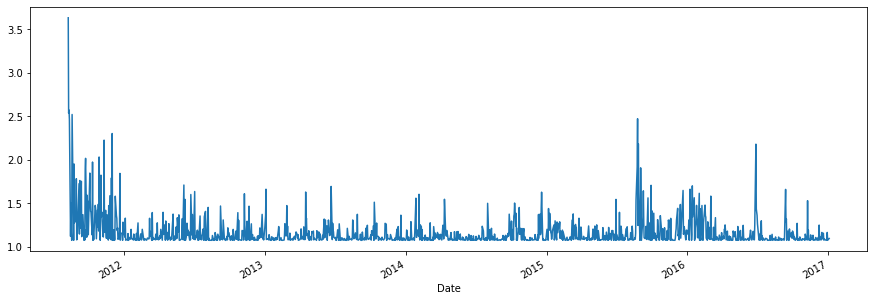

In [ ]:
df2.loc['2011-08-09':]['ARCH(1)'].plot(figsize=(15, 5));

In [ ]:
fcast_arch1 = res_arch1.forecast(
    horizon=Ntest, reindex=True, start='2011-08-01')

In [ ]:
fcast_arch1.variance['2011-07-28':'2011-08-05']

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,h.011,h.012,h.013,h.014,h.015,h.016,h.017,h.018,h.019,h.020,h.021,h.022,h.023,h.024,h.025,h.026,h.027,h.028,h.029,h.030,h.031,h.032,h.033,h.034,h.035,h.036,h.037,h.038,h.039,h.040,...,h.461,h.462,h.463,h.464,h.465,h.466,h.467,h.468,h.469,h.470,h.471,h.472,h.473,h.474,h.475,h.476,h.477,h.478,h.479,h.480,h.481,h.482,h.483,h.484,h.485,h.486,h.487,h.488,h.489,h.490,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.211915,1.366921,1.394367,1.399227,1.400088,1.400240,1.400267,1.400272,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-02,2.972329,1.678627,1.449559,1.409000,1.401818,1.400546,1.400321,1.400281,1.400274,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-03,1.214825,1.367437,1.394459,1.399243,1.400091,1.400241,1.400267,1.400272,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-04,7.294965,2.444010,1.585081,1.432996,1.406067,1.401299,1.400454,1.400305,1.400278,1.400274,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273

In [ ]:
fcast_arch1.variance.loc['2011-08-09'].to_numpy().shape

(500,)

In [ ]:
df2.index.get_loc('2011-08-09')

402

In [ ]:
df2.index[402 + 500]

Timestamp('2013-08-06 00:00:00')

In [ ]:
df2.loc['2011-08-10':'2013-08-06', 'ARCH(1) Forecast'] = np.sqrt(
    fcast_arch1.variance.loc['2011-08-09'].to_numpy())

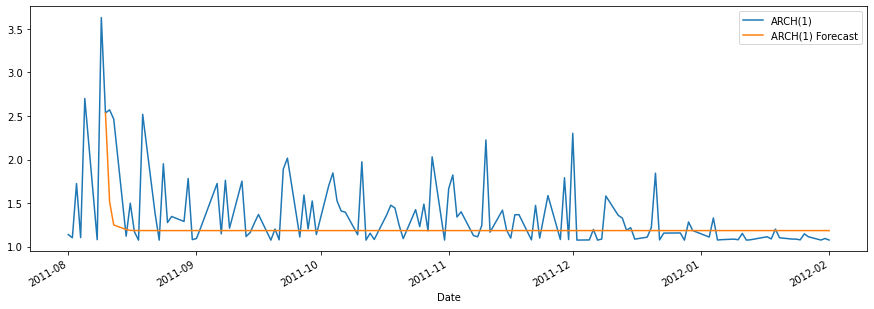

In [ ]:
df2.loc['2011-08-01':'2012-02-01'][['ARCH(1)', 'ARCH(1) Forecast']].plot(
    figsize=(15, 5));

In [ ]:
fcast_arch1.variance.index.get_loc('2011-08-17')

408

In [ ]:
df2.index[408 + 500]

Timestamp('2013-08-14 00:00:00')

In [ ]:
df2.loc['2011-08-18':'2013-08-14', 'ARCH(1) Forecast Low'] = np.sqrt(
    fcast_arch1.variance.loc['2011-08-17'].to_numpy())

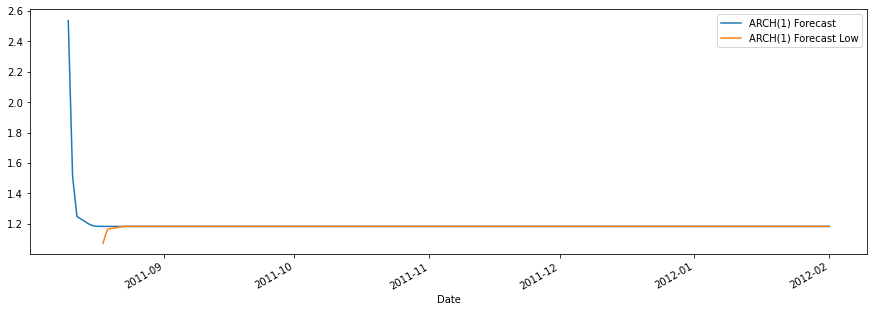

In [ ]:
plot_cols = ['ARCH(1) Forecast', 'ARCH(1) Forecast Low']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [ ]:
# theoretical unconditional variance
res_arch1.params

mu          0.015031
omega       1.152335
alpha[1]    0.177064
Name: params, dtype: float64

In [ ]:
res_arch1.params['omega'] / (1 - res_arch1.params['alpha[1]'])

1.4002727855785724

In [ ]:
fcast_arch1.variance.loc['2011-08-17'].to_numpy()[-1]

1.4002727855785724

In [ ]:
fcast_arch1.variance.loc['2011-08-09'].to_numpy()[-1]

1.4002727855785724

## GARCH(1, 1)

In [ ]:
garch11 = arch_model(train['Scaled'], vol='GARCH', p=1, q=1)

In [ ]:
res_garch11 = garch11.fit(update_freq=10)

Iteration:     10,   Func. Count:     71,   Neg. LLF: 2570.117909465577
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2570.1176176708113
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


In [ ]:
res_garch11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2570.12
Distribution:                  Normal   AIC:                           5148.24
Method:            Maximum Likelihood   BIC:                           5170.13
                                        No. Observations:                 1762
Date:                Sun, Jul 18 2021   Df Residuals:                     1761
Time:                        22:14:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0340  2.213e-02      1.538      0.124 [-9.336e-03,7.740e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0660  1.492e-02      4.427  9.560e-06 [3.680e-02,9.528e-02]
alpha[1]       0.1499  2.499e-02      6.000  1.971e-09     [  0.101,  0.199]
beta[1]        0.8021  2.545e-02     31.515 5.446e-218     [  0.752,  0.852]
============================================================================

Covariance estimator: robust
"""

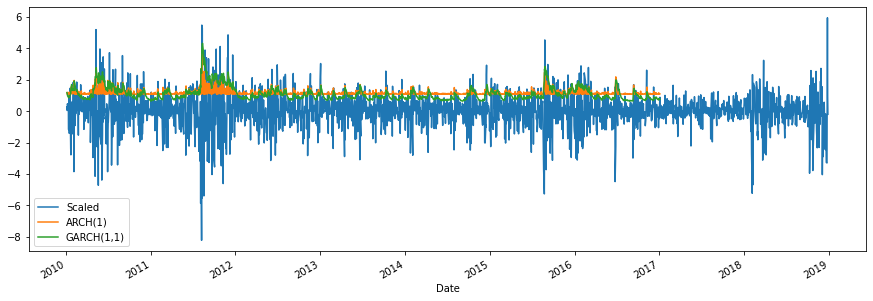

In [ ]:
df2['GARCH(1,1)'] = res_garch11.conditional_volatility
df2[['Scaled', 'ARCH(1)', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [ ]:
fcast_garch11 = res_garch11.forecast(
    horizon=Ntest, reindex=False, start='2011-08-09')

In [ ]:
df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1) Forecast'] = np.sqrt(
    fcast_garch11.residual_variance.loc['2011-08-09'].to_numpy())

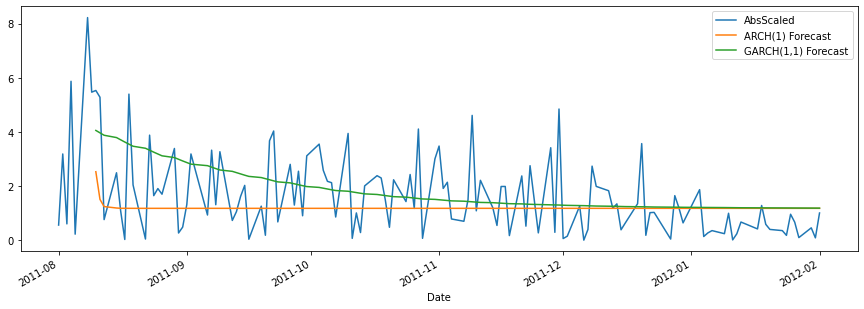

In [ ]:
df2['AbsScaled'] = df2['Scaled'].abs()

plot_cols = ['AbsScaled', 'ARCH(1) Forecast', 'GARCH(1,1) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

## t-Distribution

In [ ]:
garch11t = arch_model(train['Scaled'], vol='GARCH', p=1, q=1, dist='StudentsT')

In [ ]:
res_garch11t = garch11t.fit(update_freq=10)

Iteration:     10,   Func. Count:     83,   Neg. LLF: 2531.2001653179254
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2531.18946279766
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14


In [ ]:
res_garch11t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2531.19
Distribution:      Standardized Student's t   AIC:                           5072.38
Method:                  Maximum Likelihood   BIC:                           5099.75
                                              No. Observations:                 1762
Date:                      Sun, Jul 18 2021   Df Residuals:                     1761
Time:                              22:15:36   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0559  2.006e-02      2.788  5.310e-03 [1.660e-02,9.523e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0562  1.308e-02      4.296  1.743e-05 [3.056e-02,8.184e-02]
alpha[1]       0.1615  2.507e-02      6.442  1.177e-10     [  0.112,  0.211]
beta[1]        0.8081  2.353e-02     34.347 1.537e-258     [  0.762,  0.854]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5805      0.733      7.610  2.741e-14 [  4.143,  7.018]
========================================================================

Covariance estimator: robust
"""

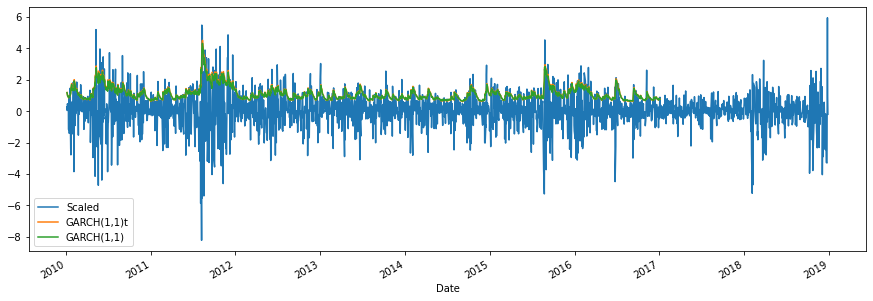

In [ ]:
df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [ ]:
fcast_garch11t = res_garch11t.forecast(
    horizon=Ntest, reindex=False, start='2011-08-09')

In [ ]:
df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1)t Forecast'] = np.sqrt(
    fcast_garch11t.residual_variance.loc['2011-08-09'].to_numpy())

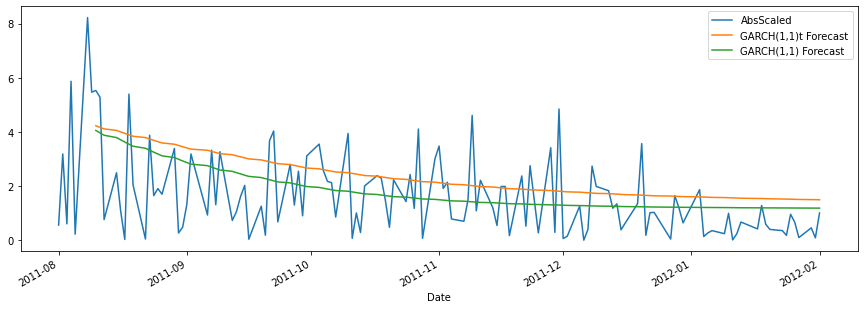

In [ ]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(1,1) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

## GARCH(p, q)

In [ ]:
garchpq = arch_model(train['Scaled'], p=8, q=5, dist='StudentsT')

In [ ]:
res_garchpq = garchpq.fit(update_freq=10)

Iteration:     10,   Func. Count:    194,   Neg. LLF: 2527.3578161218593
Iteration:     20,   Func. Count:    387,   Neg. LLF: 2525.6611921687636
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2525.28822444509
            Iterations: 29
            Function evaluations: 549
            Gradient evaluations: 29


In [ ]:
res_garchpq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2525.29
Distribution:      Standardized Student's t   AIC:                           5082.58
Method:                  Maximum Likelihood   BIC:                           5170.16
                                              No. Observations:                 1762
Date:                      Sun, Jul 18 2021   Df Residuals:                     1761
Time:                              22:16:59   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0579  2.018e-02      2.869  4.119e-03 [1.834e-02,9.744e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1896      0.126      1.509      0.131 [-5.661e-02,  0.436]
alpha[1]       0.0751  3.299e-02      2.278  2.273e-02  [1.049e-02,  0.140]
alpha[2]       0.2069  8.138e-02      2.543  1.100e-02  [4.742e-02,  0.366]
alpha[3]       0.0828      0.196      0.424      0.672    [ -0.300,  0.466]
alpha[4]       0.0000      0.110      0.000      1.000    [ -0.215,  0.215]
alpha[5]       0.0328      0.147      0.223      0.824    [ -0.255,  0.321]
alpha[6]       0.0383  6.546e-02      0.585      0.559 [-9.002e-02,  0.167]
alpha[7]       0.0259  8.807e-02      0.294      0.769    [ -0.147,  0.199]
alpha[8]       0.0361  4.227e-02      0.853      0.394 [-4.679e-02,  0.119]
beta[1]        0.0000      0.901      0.000      1.000    [ -1.766,  1.766]
beta[2]        0.3957      0.451      0.877      0.380    [ -0.488,  1.280]
beta[3]        0.0000      0.840      0.000      1.000    [ -1.646,  1.646]
beta[4]        0.0000      0.437      0.000      1.000    [ -0.857,  0.857]
beta[5]        0.0000      0.523      0.000      1.000    [ -1.025,  1.025]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.7060      0.771      7.398  1.384e-13 [  4.194,  7.218]
========================================================================

Covariance estimator: robust
"""

In [ ]:
res_arch1.aic, res_garch11.aic, res_garch11t.aic, res_garchpq.aic

(5523.987409760295, 5148.235235341623, 5072.37892559532, 5082.57644889018)

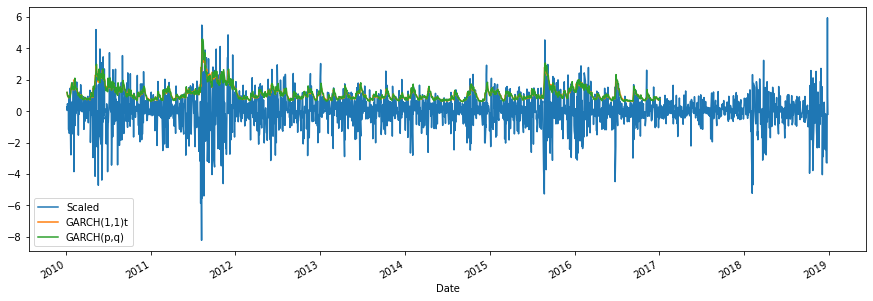

In [ ]:
df2['GARCH(p,q)'] = res_garchpq.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(p,q)']].plot(figsize=(15, 5));

In [ ]:
fcast_garchpq = res_garchpq.forecast(
    horizon=Ntest, reindex=False, start='2011-08-09')

In [ ]:
df2.loc['2011-08-10':'2013-08-06', 'GARCH(p,q) Forecast'] = np.sqrt(
    fcast_garch11t.variance.loc['2011-08-09'].to_numpy())

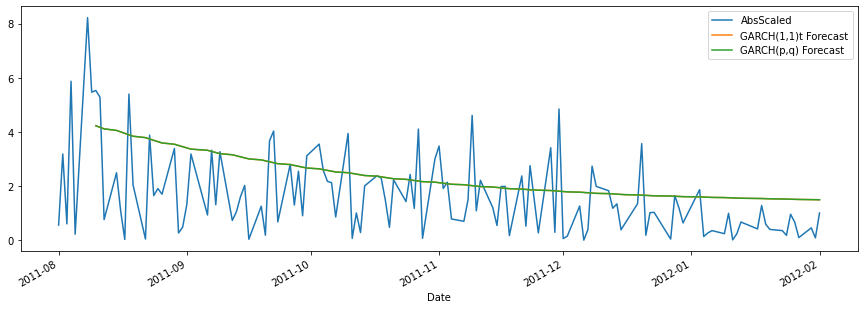

In [ ]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(p,q) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [ ]:
train_idx = df2.index <= train.index[-1]
test_idx = ~train_idx

In [ ]:
df2.loc[train_idx, 'GARCH(p,q) Train'] = res_garchpq.conditional_volatility
df2.loc[test_idx, 'GARCH(p,q) Test'] = np.sqrt(
    fcast_garchpq.variance.iloc[-1].to_numpy())

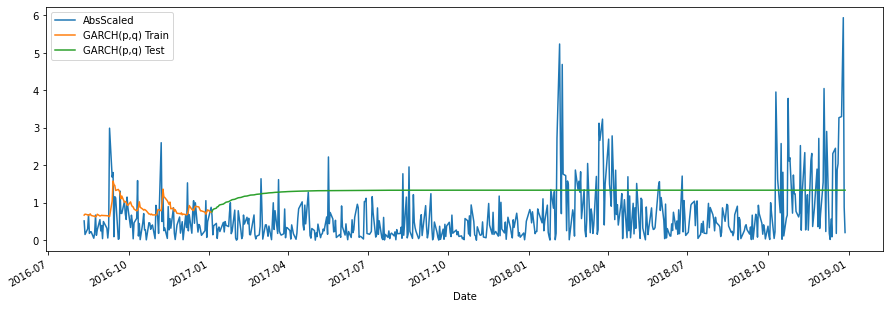

In [ ]:
plot_cols = ['AbsScaled', 'GARCH(p,q) Train', 'GARCH(p,q) Test']
df2.iloc[-(Ntest+100):][plot_cols].plot(figsize=(15, 5));